In [ ]:
pip install yfinance --upgrade --no-cache-dir

In [ ]:
import tensorflow as tf
import math
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yfin
yfin.pdr_override()


In [ ]:
df = pdr.get_data_yahoo('TSLA', start='2020-04-03', end='2022-04-13')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-03,33.966667,34.366001,31.226000,32.000668,32.000668,338431500
2020-04-06,34.080002,34.733334,33.197334,34.416000,34.416000,223527000
2020-04-07,36.333332,37.666668,35.489334,36.363335,36.363335,268797000
2020-04-08,36.946667,37.147331,35.555332,36.589333,36.589333,189840000
2020-04-09,37.472668,38.345333,37.140667,38.200001,38.200001,204750000


Text(0, 0.5, 'Close Price')

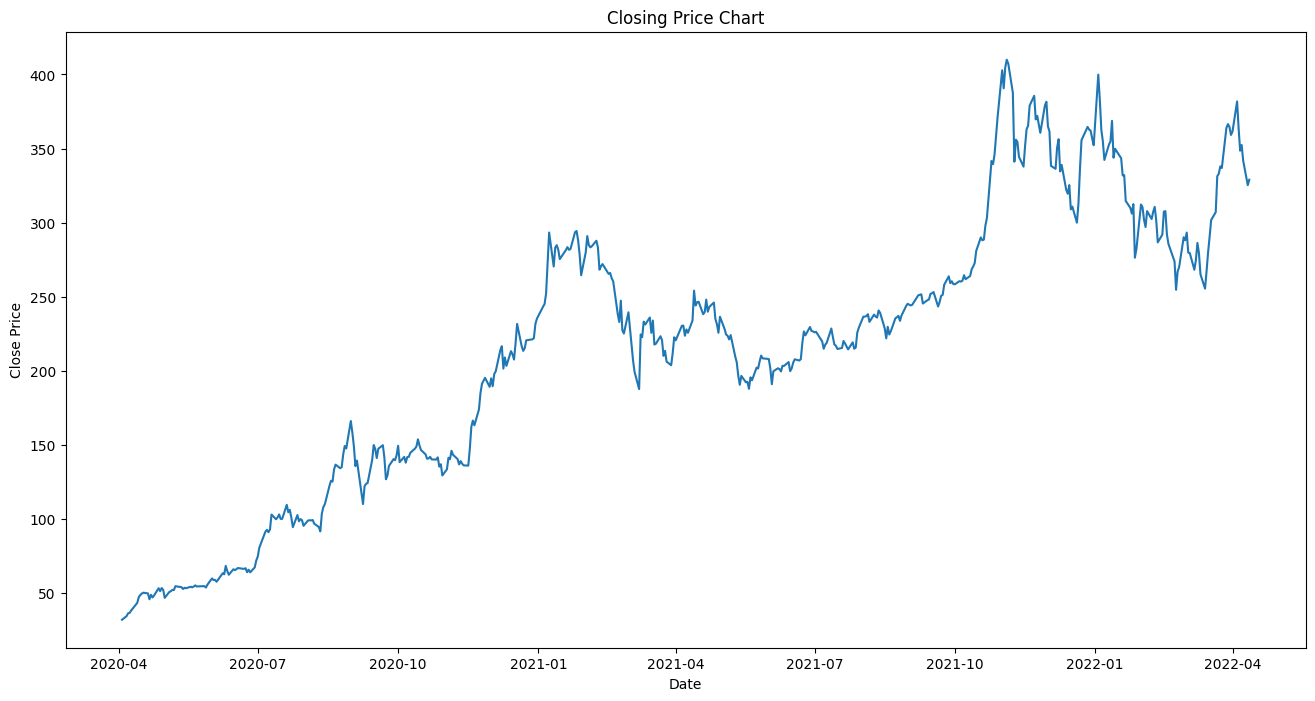

In [ ]:
#plot closing price
plt.figure(figsize=(16, 8))
plt.title('Closing Price Chart')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')


In [ ]:
#taking date column and close column
close_price = df.filter(['Close'])
close_price.head()

,Close
Date,
2020-04-03,32.000668
2020-04-06,34.416000
2020-04-07,36.363335
2020-04-08,36.589333
2020-04-09,38.200001


In [ ]:
#convert df to numpy array
close_price_array = df["Close"].values.tolist()

close_price_array = np.array(close_price_array).reshape((511,1))

close_price_array.shape


(511, 1)

In [ ]:
#scaling data
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
normalize_data = scaler.fit_transform(close_price_array)

In [ ]:
normalize_data.shape

(511, 1)

In [ ]:
split = 408
train_data = normalize_data[:split]
val_data = normalize_data[split:]
print("Bentuk data latih: ", train_data.shape)
print("Bentuk data validasi: ", val_data.shape)

Bentuk data latih:  (408, 1)
Bentuk data validasi:  (103, 1)


In [ ]:
#create training data and validation data using tensor spec
def window_dataset(series, window_size, shuffle_buffer):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    ds = ds.shuffle(buffer_size=shuffle_buffer)
    return ds.batch(1).prefetch(1)

# windowed dataset without shuffle
def window_dataset2(series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    return ds.batch(1).prefetch(1)

In [ ]:
windowed_train = window_dataset(train_data, 7, 400)
windowed_val = window_dataset2(val_data, 7)
windowed_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>

In [ ]:
for x, y in windowed_train:
  print("x = ", x.numpy().shape)
  print("y = ", y.numpy().shape)
  print()

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1,

In [ ]:
def stock_prediction_model():
  model = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(128, return_sequences=True, input_shape=[7, 1]),
          tf.keras.layers.LSTM(128),
          tf.keras.layers.Dense(1),
  ])

  model.compile(optimizer="sgd", loss=tf.keras.losses.Huber(), metrics=['MAPE'])

  return model

In [ ]:
model = stock_prediction_model()
history = model.fit(windowed_train, epochs=15)

Epoch 1/15
401/401 [==============================] - 20s 14ms/step - loss: 0.0198 - MAPE: 91.5481
Epoch 2/15
401/401 [==============================] - 4s 10ms/step - loss: 0.0127 - MAPE: 82.4720
Epoch 3/15
401/401 [==============================] - 3s 8ms/step - loss: 0.0091 - MAPE: 69.9474
Epoch 4/15
401/401 [==============================] - 3s 7ms/step - loss: 0.0059 - MAPE: 54.8442
Epoch 5/15
401/401 [==============================] - 2s 6ms/step - loss: 0.0034 - MAPE: 40.9611
Epoch 6/15
401/401 [==============================] - 2s 6ms/step - loss: 0.0020 - MAPE: 28.8589
Epoch 7/15
401/401 [==============================] - 3s 6ms/step - loss: 0.0012 - MAPE: 20.2948
Epoch 8/15
401/401 [==============================] - 3s 6ms/step - loss: 8.8080e-04 - MAPE: 14.0639
Epoch 9/15
401/401 [==============================] - 3s 7ms/step - loss: 7.5614e-04 - MAPE: 10.7891
Epoch 10/15
401/401 [==============================] - 2s 6ms/step - loss: 7.3087e-04 - MAPE: 9.1082
Epoch 11/15
401

dict_keys(['loss', 'MAPE'])


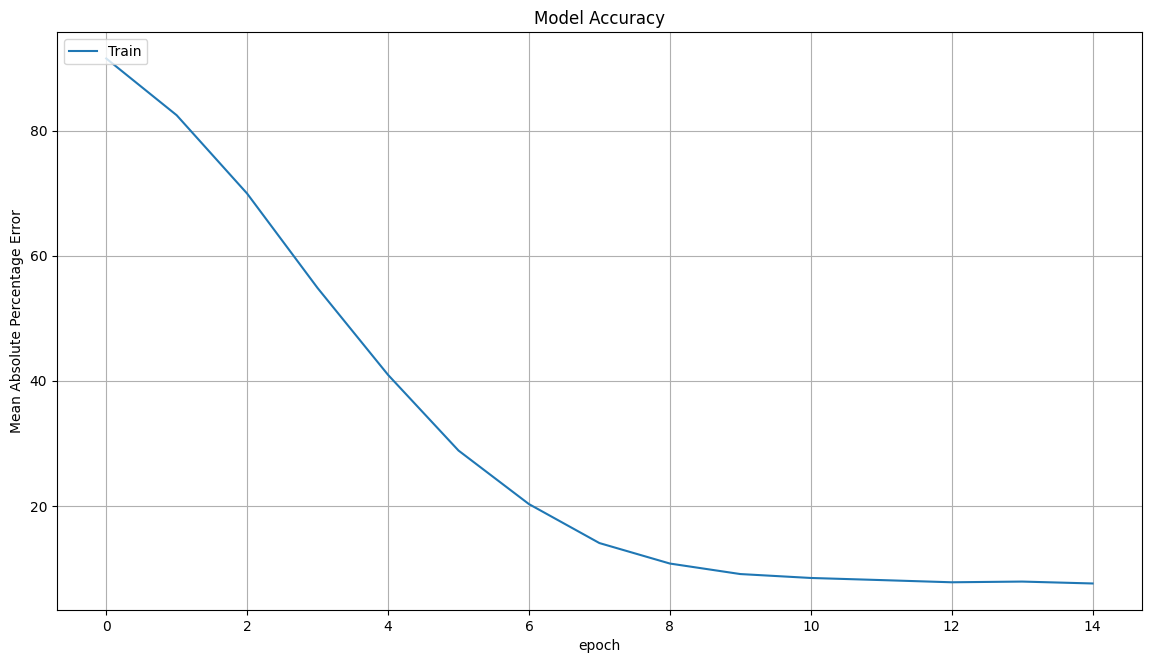

In [ ]:
print(history.history.keys())

plt.figure(figsize=(14, 7.5))
plt.plot(history.history['MAPE'], label="Train")
plt.title('Model Accuracy')
plt.ylabel('Mean Absolute Percentage Error')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

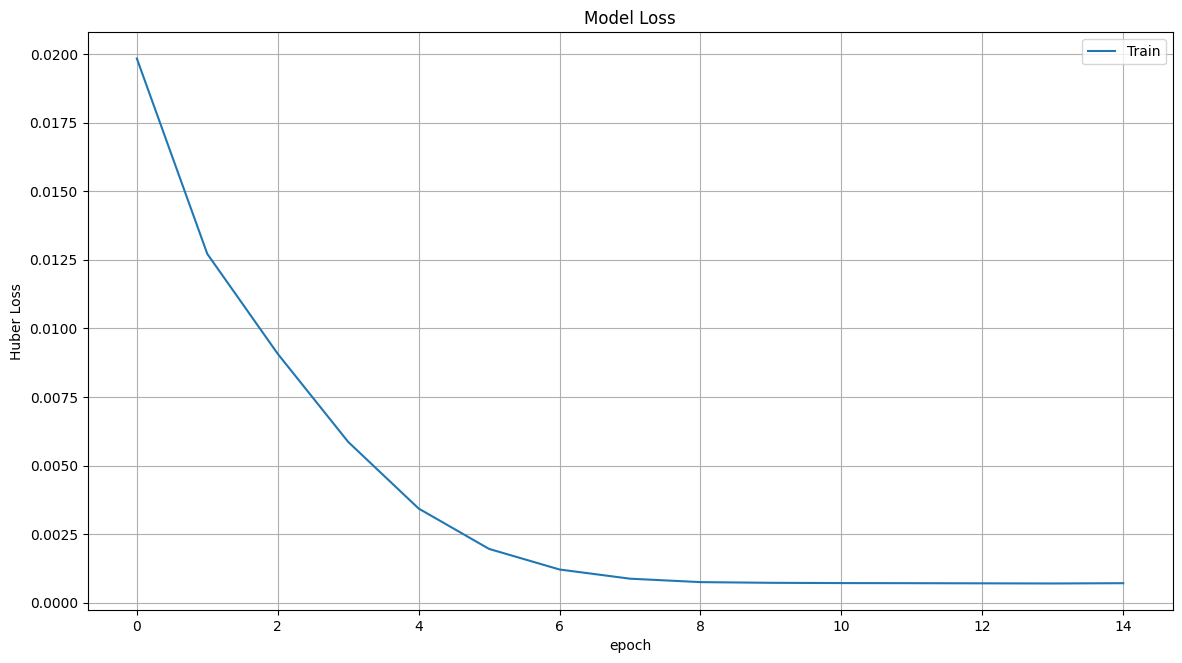

In [ ]:
plt.figure(figsize=(14, 7.5))
plt.plot(history.history['loss'], label="Train")
plt.title('Model Loss')
plt.ylabel('Huber Loss')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
prediction = model.predict(windowed_val)
prediction = scaler.inverse_transform(prediction)

97/97 [==============================] - 1s 3ms/step


Mean Absolute Percentage Error: 4.800386815335177


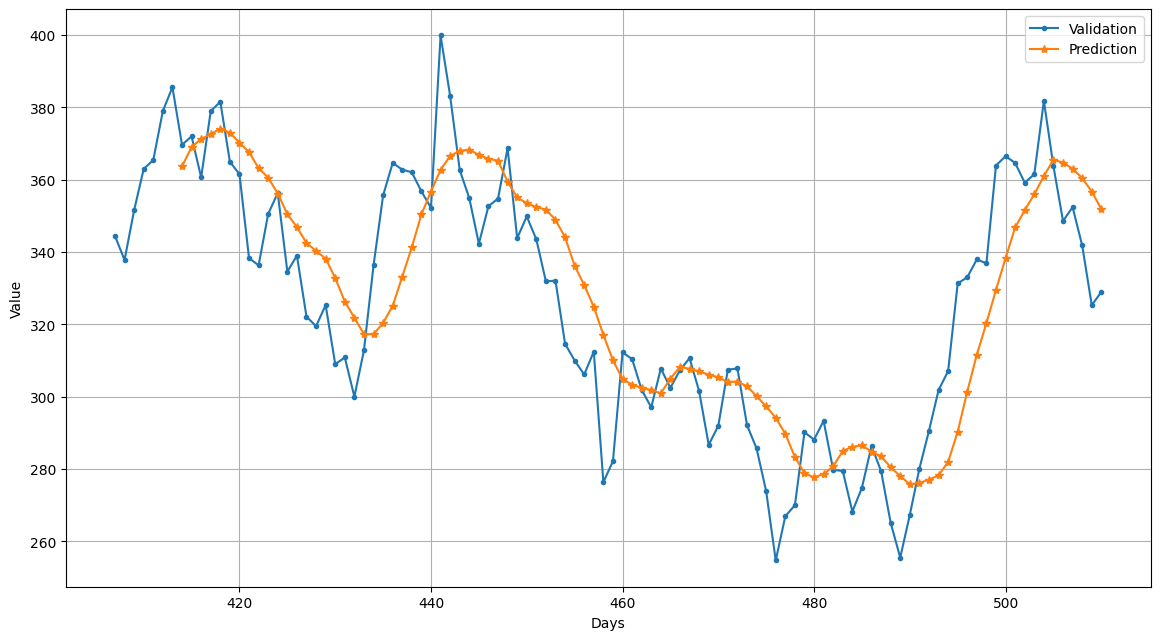

In [ ]:

time = []

for i in range(len(normalize_data)):
  time.append(i)
plt.figure(figsize=(14, 7.5))
#plt.plot(time[:split], close_price_array[:split], label="Train")
plt.plot(time[split-1:], close_price_array[split-1:], marker='.', label="Validation")
plt.plot(time[414:], prediction, marker='*',label="Prediction")
plt.xlabel("Days")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
mape = np.mean(np.abs((close_price_array[split+6:] - prediction)/close_price_array[split+6:]))*100
print("Mean Absolute Percentage Error:", mape)

In [ ]:
model.save("stock_prediction_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = tf.keras.models.load_model("stock_prediction_model.h5")

In [ ]:
new_model.predict(windowed_val)

NameError: ignored